In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
ruta = "combined_data_vCorta.csv"
df = pd.read_csv(ruta, error_bad_lines=False)
df.head()

,id_movie,id_user,ranking,fecha
0,3,1025579,4,2003-03-29
1,3,712664,5,2004-02-01
2,3,1331154,4,2004-07-03
3,3,2632461,3,2005-07-22
4,3,44937,5,2004-06-22


In [2]:
df.tail()

,id_movie,id_user,ranking,fecha
3768685,808,318116,2,2005-03-18
3768686,808,1033266,3,2005-05-01
3768687,808,2633357,4,2005-06-07
3768688,808,15737,2,2005-06-22
3768689,808,1226831,4,2005-09-23


In [3]:
cabecera = ["id_movie", "id_user", "ranking", "date"]
df.columns = cabecera
df.head()

,id_movie,id_user,ranking,date
0,3,1025579,4,2003-03-29
1,3,712664,5,2004-02-01
2,3,1331154,4,2004-07-03
3,3,2632461,3,2005-07-22
4,3,44937,5,2004-06-22


In [4]:
df.dtypes

id_movie     int64
id_user      int64
ranking      int64
date        object
dtype: object

In [5]:
df.describe()

,id_movie,id_user,ranking
count,3.768690e+06,3.768690e+06,3.768690e+06
mean,4.177394e+02,1.322334e+06,3.602383e+00
std,2.210622e+02,7.645477e+05,1.058069e+00
min,3.000000e+00,6.000000e+00,1.000000e+00
25%,2.530000e+02,6.609620e+05,3.000000e+00
50%,4.130000e+02,1.318953e+06,4.000000e+00
75%,6.070000e+02,1.984480e+06,4.000000e+00
max,8.080000e+02,2.649429e+06,5.000000e+00


In [6]:
df.describe(include = "all")

,id_movie,id_user,ranking,date
count,3.768690e+06,3.768690e+06,3.768690e+06,3768690
unique,NaN,NaN,NaN,2175
top,NaN,NaN,NaN,2005-01-19
freq,NaN,NaN,NaN,27082
mean,4.177394e+02,1.322334e+06,3.602383e+00,NaN
std,2.210622e+02,7.645477e+05,1.058069e+00,NaN
min,3.000000e+00,6.000000e+00,1.000000e+00,NaN
25%,2.530000e+02,6.609620e+05,3.000000e+00,NaN
50%,4.130000e+02,1.318953e+06,4.000000e+00,NaN
75%,6.070000e+02,1.984480e+06,4.000000e+00,NaN


4    1328952
3    1098566
5     813645
2     369008
1     158519
Name: ranking, dtype: int64


array([[<AxesSubplot:title={'center':'ranking'}>]], dtype=object)

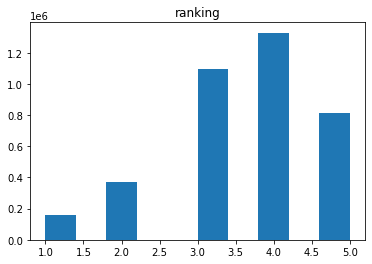

In [9]:
print(df['ranking'].value_counts())
df.hist(column = 'ranking', grid=False)

571    154832
30     118413
457    116762
758    104362
607    100248
        ...  
549        72
772        69
608        68
272        62
392        60
Name: id_movie, Length: 500, dtype: int64


array([[<AxesSubplot:title={'center':'id_movie'}>]], dtype=object)

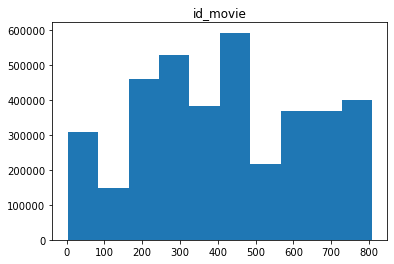

In [12]:
print(df['id_movie'].value_counts())
df.hist(column = 'id_movie', grid=False)

<AxesSubplot:>

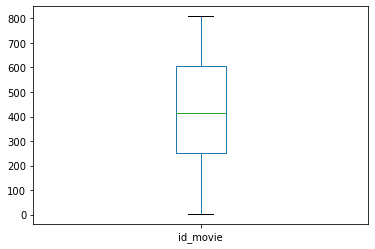

In [14]:
df.boxplot(column = 'id_movie', grid=False)

<AxesSubplot:>

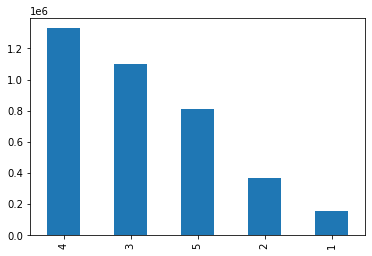

In [15]:
fig, ax = plt.subplots()
df['ranking'].value_counts().plot(ax=ax, kind='bar')

<AxesSubplot:>

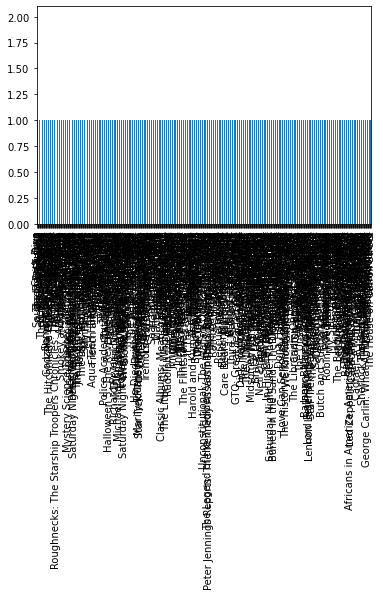

In [26]:
fig, ax = plt.subplots()
df['Movie'].value_counts().plot(ax=ax, kind='bar')

<AxesSubplot:>

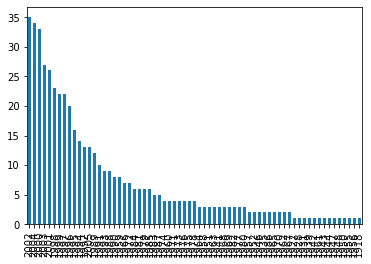

In [10]:
fig, ax = plt.subplots()
df['Year'].value_counts().plot(ax=ax, kind='bar')

<AxesSubplot:>

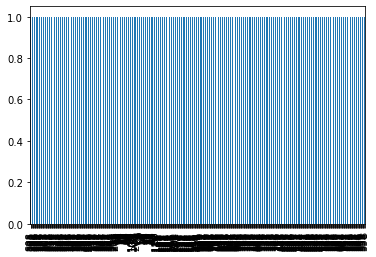

In [11]:
fig, ax = plt.subplots()
df['ID'].value_counts().plot(ax=ax, kind='bar')

<AxesSubplot:>

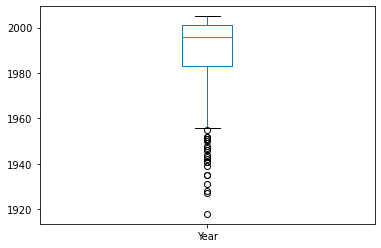

In [12]:
df.boxplot(column = 'Year', grid=False)

<AxesSubplot:>

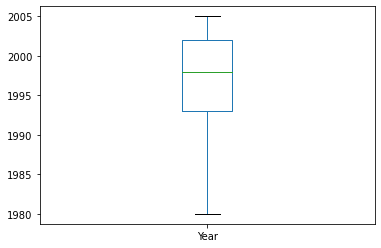

In [13]:
df2 = df[df.Year > 1979]
df2.boxplot(column = 'Year', grid=False)

In [14]:
columnas = list(df)
for columna in columnas:
    print("Cantidad de datos sin " + columna + ": " + str(len(df) - df[columna].count()))
    print(str(np.round((len(df) - df[columna].count())/float(len(df))*100,2))+"%")
    print("-------")

Cantidad de datos sin ID: 0
0.0%
-------
Cantidad de datos sin Year: 0
0.0%
-------
Cantidad de datos sin Movie: 0
0.0%
-------


In [15]:
df.head()

,ID,Year,Movie
0,3,1997,Character
1,5,2004,The Rise and Fall of ECW
2,6,1997,Sick
3,7,1992,8 Man
4,8,2004,What the #$*! Do We Know!?


In [16]:
df.dropna(axis=0)

,ID,Year,Movie
0,3,1997,Character
1,5,2004,The Rise and Fall of ECW
2,6,1997,Sick
3,7,1992,8 Man
4,8,2004,What the #$*! Do We Know!?
...,...,...,...
487,803,2001,Soul Assassin
488,804,1944,Sherlock Holmes: The Scarlet Claw
489,806,1960,Eyes Without a Face
490,807,1959,The Mouse That Roared


In [17]:
df.dropna(axis = 1)

,ID,Year,Movie
0,3,1997,Character
1,5,2004,The Rise and Fall of ECW
2,6,1997,Sick
3,7,1992,8 Man
4,8,2004,What the #$*! Do We Know!?
...,...,...,...
487,803,2001,Soul Assassin
488,804,1944,Sherlock Holmes: The Scarlet Claw
489,806,1960,Eyes Without a Face
490,807,1959,The Mouse That Roared


Eliminaremos las filas sin datos en "edad" y "Embarque" y luego las columnas enteras que no tengan datos ("Cabina")
<br>
df2 = copy.copy(df)
<br>
df2.dropna(subset = \["edad"\], axis = 0, inplace = True)
<br>
df2.dropna(subset = \["Embarque"\], axis = 0, inplace = True)
<br>
df2.dropna(axis = 1, inplace = True)
<br>
df2

In [20]:
df2.describe()

,ID,Year
count,382.000000,382.000000
mean,417.578534,1996.939791
std,231.751378,6.227029
min,3.000000,1980.000000
25%,209.250000,1993.000000
50%,426.500000,1998.000000
75%,628.750000,2002.000000
max,808.000000,2005.000000


In [22]:
#df2 = df2[df2.edad < 100]
df2.describe()

,ID,Year
count,382.000000,382.000000
mean,417.578534,1996.939791
std,231.751378,6.227029
min,3.000000,1980.000000
25%,209.250000,1993.000000
50%,426.500000,1998.000000
75%,628.750000,2002.000000
max,808.000000,2005.000000


In [24]:
# Reemplazar datos
df3 = df
#promedio_edad = df3["edad"].mean()
#print(promedio_edad)

In [25]:
#df3["edad"].replace(np.nan, promedio_edad, inplace=True)
df3.describe()

,ID,Year
count,492.000000,492.000000
mean,415.093496,1989.310976
std,231.653042,16.475460
min,3.000000,1918.000000
25%,211.500000,1983.000000
50%,415.500000,1996.000000
75%,622.750000,2001.000000
max,808.000000,2005.000000
